# DTC Breast Cancer

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report)
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

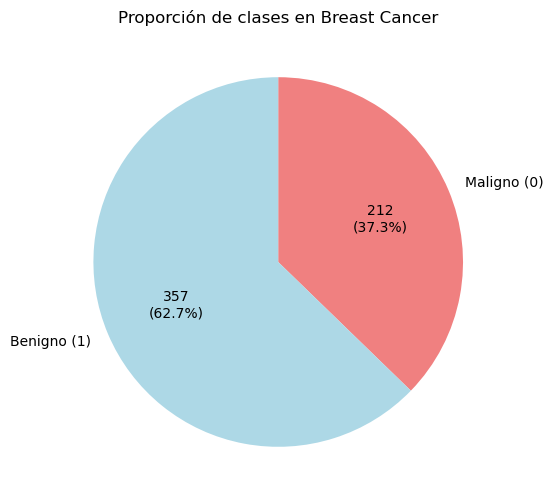

In [35]:
breastCancer = load_breast_cancer()
X = breastCancer.data
y = breastCancer.target
df = breastCancer.frame

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df["target"] = cancer.target

counts = df["target"].value_counts().sort_index()
labels = ["Maligno (0)", "Benigno (1)"]

def autopct_func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{absolute}\n({pct:.1f}%)"

plt.figure(figsize=(6,6))
plt.pie(
    counts, labels=labels, autopct=lambda pct: autopct_func(pct, counts), 
    colors=['lightcoral', 'lightblue'], startangle=90, counterclock=False
)
plt.title("Proporción de clases en Breast Cancer")
plt.ylabel("")
plt.show()

X = df.drop(columns=["target"]).values
y = df["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [36]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precisión: {precision * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"Reporte de clasificación: \n{classification_report(y_test, y_pred, zero_division=0)}")

Accuracy: 92.98%
Precisión: 92.76%
F1-score: 92.46%
Recall: 92.19%
Reporte de clasificación: 
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        64
           1       0.94      0.95      0.94       107

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



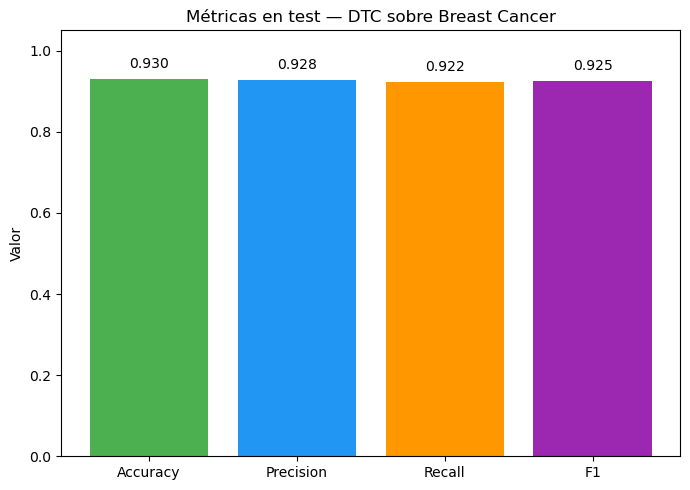

In [37]:
metric_names = ["Accuracy", "Precision", "Recall", "F1"]
metric_vals  = [accuracy, precision, recall, f1]

plt.figure(figsize=(7,5))
bars = plt.bar(metric_names, metric_vals, color=["#4caf50", "#2196f3", "#ff9800", "#9c27b0"])
plt.ylim(0, 1.05)
plt.title("Métricas en test — DTC sobre Breast Cancer")
plt.ylabel("Valor")
for rect, val in zip(bars, metric_vals):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height + 0.02, f"{val:.3f}",
             ha='center', va='bottom')
plt.tight_layout()
plt.show()

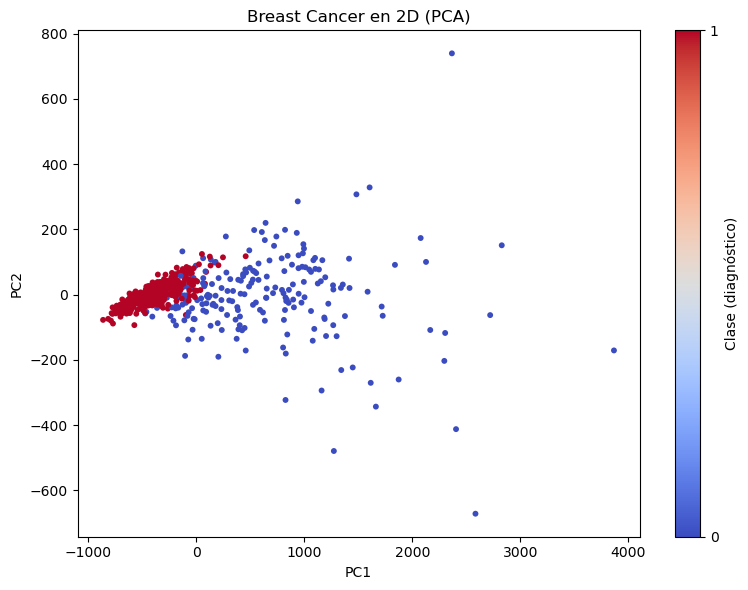

In [44]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", s=18, edgecolor="none")
plt.title("Breast Cancer en 2D (PCA)")
plt.xlabel("PC1"); plt.ylabel("PC2")
cbar = plt.colorbar(scatter, ticks=range(3))
cbar.set_label("Clase (diagnóstico)")
plt.tight_layout()
plt.show()

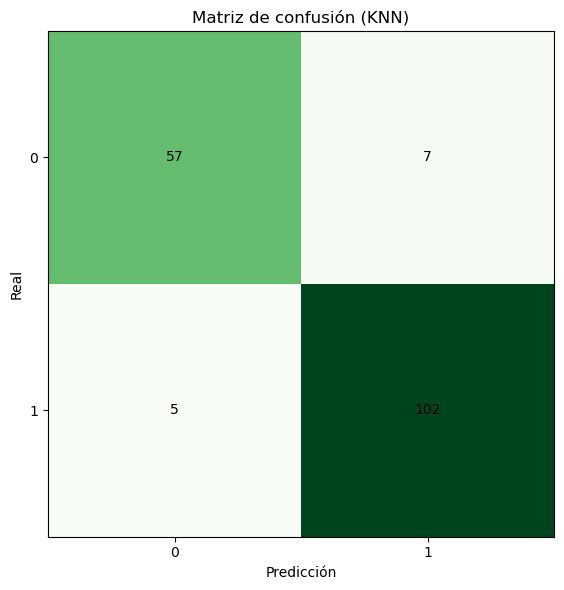

In [45]:
plt.figure(figsize=(7,6))
plt.imshow(cm, cmap="Greens", interpolation="nearest")
plt.title("Matriz de confusión (KNN)")
plt.xticks(ticks=range(2), labels=range(2))
plt.yticks(ticks=range(2), labels=range(2))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

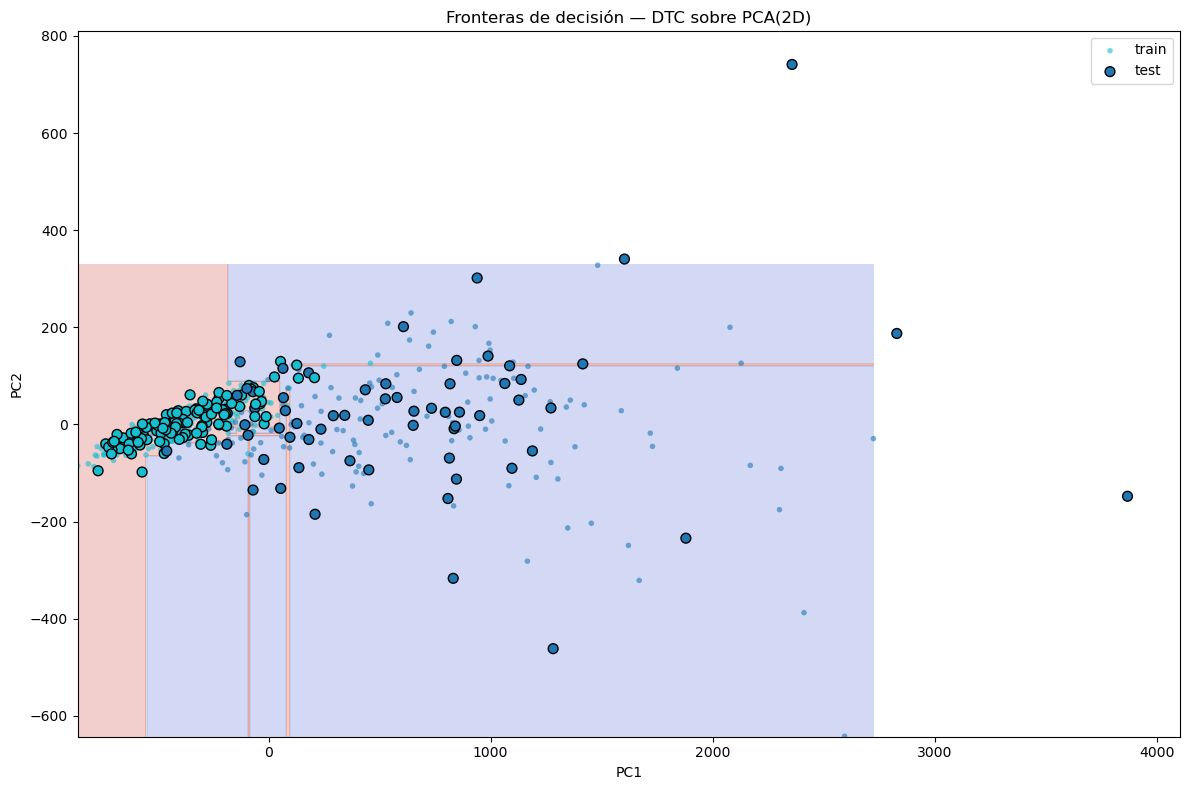

In [43]:
pca2 = PCA(n_components=2, random_state=42)
X_train_pca = pca2.fit_transform(X_train)
X_test_pca  = pca2.transform(X_test)

DTC2 = DecisionTreeClassifier()
DTC2.fit(X_train_pca, y_train)

# malla en el plano PCA
x_min, x_max = X_train_pca[:,0].min()-1, X_train_pca[:,0].max()+1
y_min, y_max = X_train_pca[:,1].min()-1, X_train_pca[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))
Z = DTC2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(12,8))
plt.contourf(xx, yy, Z, alpha=0.25, cmap="coolwarm")
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap="tab10",
            s=16, edgecolor="none", alpha=0.6, label="train")
plt.scatter(X_test_pca[:,0],  X_test_pca[:,1],  c=y_test,  cmap="tab10",
            s=50, edgecolor="k",   label="test")
plt.title("Fronteras de decisión — DTC sobre PCA(2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()